Tensor Flow version setup

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Imports that are needed

In [0]:
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Use this to upload the model

In [0]:
from google.colab import files
uploaded = files.upload()

Saving notMNIST.h5 to notMNIST.h5


Google Collab will not overwrite files so you'll need to remove olds ones with command line calls

In [0]:
!rm "MNIST.h5"
!rm "notMNIST.h5"
#!rm "notMNIST.npz"

rm: cannot remove 'MNIST.h5': No such file or directory


Determine the arguments

In [0]:
sys.argv = ["", input("Dataset:"), input("Model:")]

Dataset:notMNIST
Model:notMNIST.h5


In [0]:
def check_args():
     if(len(sys.argv) != 3):
          print("Usage python predict_test.py <MNIST,notMNIST> <model.h5>")
          sys.exit(1)
     if sys.argv[1] == "MNIST":
          print("--Dataset MNIST--")
          class_names = list(range(10))
          mnist = tf.keras.datasets.mnist
          (x_train, y_train), (x_test, y_test) = mnist.load_data()
          data = (x_test, y_test)
     elif sys.argv[1] == "notMNIST":
          print("--Dataset notMNIST--")
          class_names = ["A","B","C","D","E","F","G","H","I","J"]
          with np.load("notMNIST.npz", allow_pickle=True) as f:
            x_test, y_test = f['x_test'], f['y_test']
          data = (x_test, y_test)
     else:
          print(f"Choose MNIST or notMNIST, not {sys.argv[1]}")
          sys.exit(2)
     if sys.argv[2][-3:] != ".h5":
          print(f"{sys.argv[2]} is not a h5 extension")
          sys.exit(3)
     return class_names, data

Completed functions to plot for you

In [0]:
def plot(class_names, prediction, true_label, predicted_label, img):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(prediction),class_names[true_label]),color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(class_names, prediction, color="#777777")
    plt.ylim([0, 1])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Finish this function to predict output from input

--Dataset notMNIST--
--Load Model notMNIST.h5--
Pick test_image (0 -> 9999):0
--Should be Class 5--


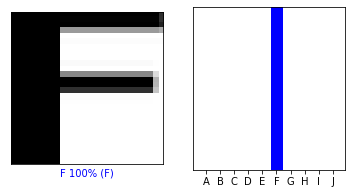

Pick test_image (0 -> 9999):238
--Should be Class 5--


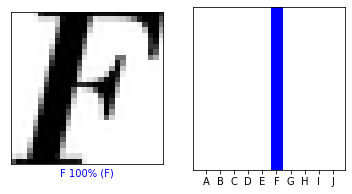

Pick test_image (0 -> 9999):69
--Should be Class 4--


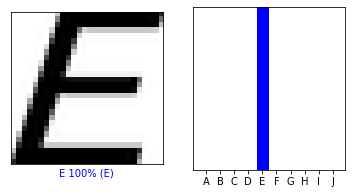

Pick test_image (0 -> 9999):26
--Should be Class 7--


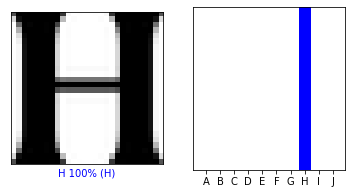

KeyboardInterrupt: ignored

In [0]:
def main():
     class_names, data = check_args()
     x_test, y_test = data
     print(f"--Load Model {sys.argv[2]}--")
     #Load the model that should be in sys.argv[2]
     model = tf.keras.models.load_model(sys.argv[2]) 
     pick = input(f"Pick test_image (0 -> {len(x_test)-1}):")
     while pick.isdigit() and int(pick) >= 0 and int(pick) < len(x_test):
        pick = int(pick)
        img = x_test[pick]
        guess = y_test[pick]
        print(f"--Should be Class {guess}--")
        predict(model, class_names, img, guess)
        pick = input(f"Pick test_image (0 -> {len(x_test)-1}):")
     print("Done")

def predict(model, class_names, img, true_label):
    img = np.array([img])
    #Replace these two lines with code to make a prediction
    prediction = model.predict(img)
    #Determine what the predicted label is
    predicted_label = 0
    plot(class_names, prediction[0], true_label, predicted_label, img[0])
    plt.show()
main()